In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
birch_src = 'BIRCH_Selection/'
uni_src = 'Uniform_Selection/'
buni_src = 'BIRCH_uniform_selection/'

uni_df_1 = pd.read_csv(uni_src+'uniform_selected_data_1.csv')
uni_df_2 = pd.read_csv(uni_src+'uniform_selected_data_2.csv')
birch_df_1 = pd.read_csv(birch_src+'BIRCH_selected_data_1.csv')
birch_df_2 = pd.read_csv(birch_src+'BIRCH_selected_data_2.csv')
buni_df_1 = pd.read_csv(buni_src+'BIRCH_uniform_selected_data_1.csv')
buni_df_2 = pd.read_csv(buni_src+'BIRCH_uniform_selected_data_2.csv')

In [26]:
def make_3d_hist(data, title):
    
    x = data['X2']
    y = data['X1']
    
    fig = plt.figure()          #create a canvas, tell matplotlib it's 3d
    ax = fig.add_subplot(111, projection='3d')

    #make histogram stuff - set bins - I choose 20x20 because I have a lot of data
    hist, xedges, yedges = np.histogram2d(x, y, bins=(20,20))
    xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

    xpos = xpos.flatten()
    ypos = ypos.flatten()
    zpos = np.zeros_like(xpos)

    dx, dy = np.meshgrid(xedges[1:] - xedges[:-1], yedges[1:] - yedges[:-1])

    dx = dx.flatten()
    dy = dy.flatten()
    dz = hist.flatten()

    cmap = plt.colormaps['jet'] # Get desired colormap - you can change this!
    max_height = np.max(dz)   # get range of colorbars so we can normalize
    min_height = np.min(dz)
    # scale each z to [0,1], and get their rgb values
    rgba = [cmap((k-min_height)/max_height) for k in dz] 

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.savefig(title)
    plt.show()

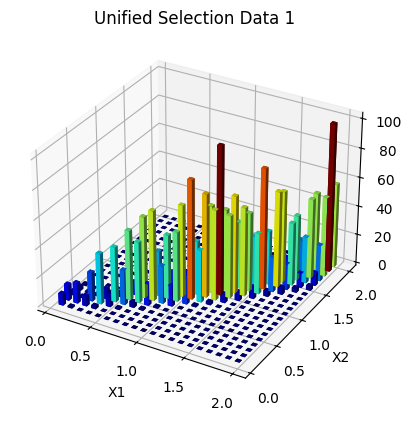

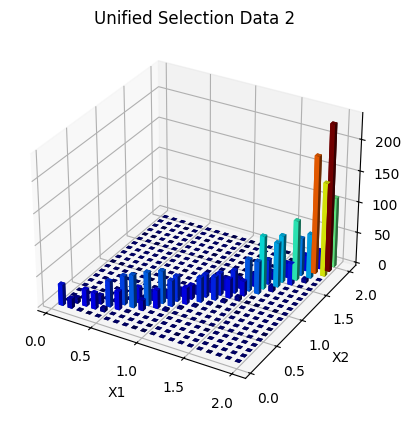

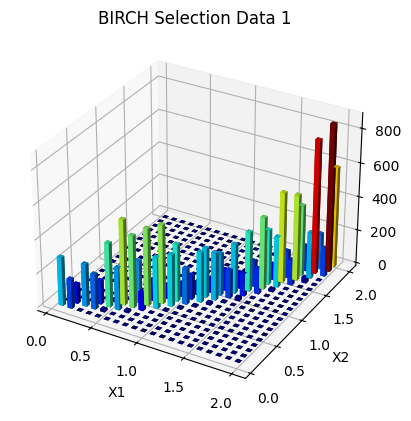

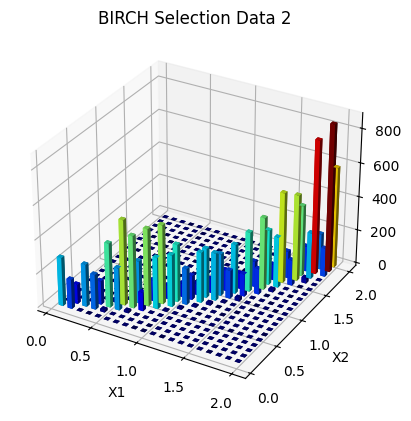

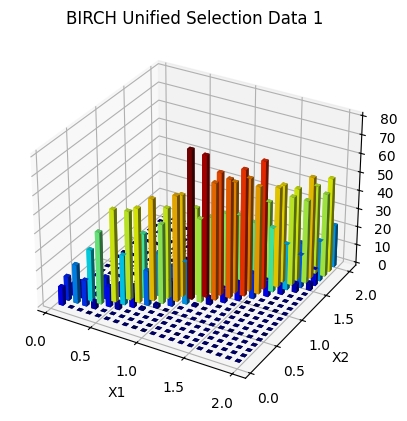

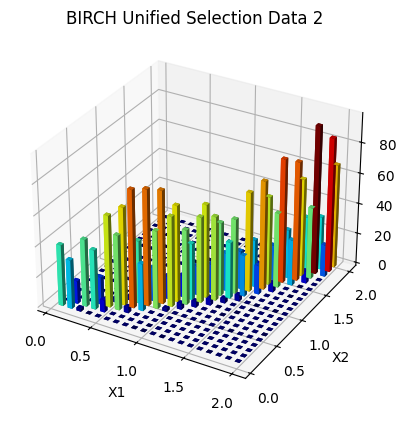

In [27]:
make_3d_hist(uni_df_1, 'Unified Selection Data 1')
make_3d_hist(uni_df_2, 'Unified Selection Data 2')
make_3d_hist(birch_df_2, 'BIRCH Selection Data 1')
make_3d_hist(birch_df_2, 'BIRCH Selection Data 2')
make_3d_hist(buni_df_1, 'BIRCH Unified Selection Data 1')
make_3d_hist(buni_df_2, 'BIRCH Unified Selection Data 2')